<a href="https://colab.research.google.com/github/AMEERKOTTA/Deep-Learning-and-Artificial-Intelligence-Tensorflow-2.0/blob/main/Chapter%2006%20%3A%20Recurrent%20Neural%20Networks%2C%20Time%20Series%20and%20Sequence%20Data/15_image_classification_using_rnn_lstm_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMAGE CLASSIFICATION USING RNN LSTM MODEL**

+ Dataset will be MNIST Handwritten Digit Dataset.

IMPORT LIBRARIES

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

LOAD THE DATASET

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
## normalize the training and testing set.
x_train = x_train / 255
x_test = x_test / 255

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


BUILD THE MODEL

In [3]:
i = Input(shape = x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation = "softmax")(x)
model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm (LSTM)                 (None, 128)               80384     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


COMPILE THE MODEL

In [4]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

TRAIN THE MODEL

In [5]:
r = model.fit(x_train, y_train, 
              validation_data = (x_test, y_test),
              epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 18s 6ms/step - loss: 0.3417 - accuracy: 0.8901 - val_loss: 0.1223 - val_accuracy: 0.9626
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1043 - accuracy: 0.9691 - val_loss: 0.0889 - val_accuracy: 0.9747
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0724 - accuracy: 0.9783 - val_loss: 0.0678 - val_accuracy: 0.9795
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0556 - accuracy: 0.9831 - val_loss: 0.0607 - val_accuracy: 0.9798
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0446 - accuracy: 0.9861 - val_loss: 0.0668 - val_accuracy: 0.9799
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0373 - accuracy: 0.9883 - val_loss: 0.0616 - val_accuracy: 0.9804
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0322 - accuracy: 0.9897 - val_loss: 0.0446 - val_ac

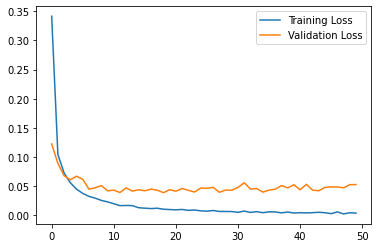

In [6]:
## plot the loss and accuracy
plt.plot(r.history["loss"], label = "Training Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();
plt.show();

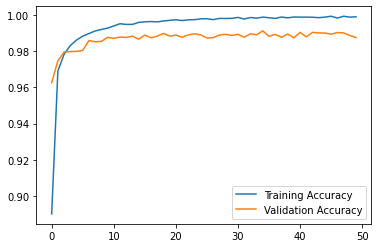

In [7]:
## plot the loss and accuracy
plt.plot(r.history["accuracy"], label = "Training Accuracy")
plt.plot(r.history["val_accuracy"], label = "Validation Accuracy")
plt.legend();
plt.show();

The model giving output that we can rely on with 99% training and validation accuracy.

***